In [22]:
from acquire import wrangle_zillow
from prepare import remove_outliers, x_y_split, rmse

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = wrangle_zillow()
df.head()

,bed,bath,sqft,tax_value,year,fips,lot_sqft
4,4.0,2.0,3633.0,296425.0,2005.0,6037.0,9826.0
7,3.0,2.0,2077.0,646760.0,1926.0,6037.0,6490.0
11,0.0,0.0,1200.0,5328.0,1972.0,6037.0,4054.0
14,0.0,0.0,171.0,6920.0,1973.0,6037.0,13002.0
15,0.0,0.0,203.0,14166.0,1960.0,6037.0,17359.0


In [24]:
df, var_fences = remove_outliers(df)

fips column ignored


In [25]:
df.shape

(45421, 7)

In [26]:
df.head()

,bed,bath,sqft,tax_value,year,fips,lot_sqft
4,4.0,2.0,3633.0,296425.0,2005.0,6037.0,9826.0
7,3.0,2.0,2077.0,646760.0,1926.0,6037.0,6490.0
18,3.0,1.0,1244.0,169471.0,1950.0,6037.0,6021.0
19,3.0,2.0,1300.0,233266.0,1950.0,6037.0,4917.0
20,3.0,2.0,1222.0,290492.0,1951.0,6037.0,5500.0


In [27]:
df.drop(columns=['year', 'lot_sqft'], inplace = True)

In [28]:
df = pd.get_dummies(df, columns=['fips', 'bed','bath'])

In [29]:
df.head()

,sqft,tax_value,fips_6037.0,fips_6059.0,fips_6111.0,bed_2.0,bed_3.0,bed_4.0,bed_5.0,bath_1.0,bath_1.5,bath_2.0,bath_2.5,bath_3.0,bath_3.5,bath_4.0,bath_4.5
4,3633.0,296425.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7,2077.0,646760.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
18,1244.0,169471.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
19,1300.0,233266.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
20,1222.0,290492.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = x_y_split(df, 'tax_value')

In [31]:
mms = MinMaxScaler()

X_train[['sqft']] = mms.fit_transform(X_train[['sqft']])

X_train.head()

,sqft,fips_6037.0,fips_6059.0,fips_6111.0,bed_2.0,bed_3.0,bed_4.0,bed_5.0,bath_1.0,bath_1.5,bath_2.0,bath_2.5,bath_3.0,bath_3.5,bath_4.0,bath_4.5
50421,0.485911,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
51037,0.560739,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
47272,0.137445,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
16353,0.113024,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
30173,0.549468,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [32]:
X_val[['sqft']] = mms.transform(X_val[['sqft']])

In [33]:
X_test[['sqft']] = mms.transform(X_test[['sqft']])

# Linear Regression

In [34]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [35]:
lm_preds = lm.predict(X_train)

In [36]:
preds = pd.DataFrame({'actual':y_train,
                      'baseline':y_train.mean(),
                      'lm_preds':lm_preds})

In [37]:
preds.head()

,actual,baseline,lm_preds
50421,247327.0,338239.323646,382976.0
51037,79255.0,338239.323646,456704.0
47272,158202.0,338239.323646,221824.0
16353,354794.0,338239.323646,209408.0
30173,446560.0,338239.323646,475264.0


In [38]:
lm_rmse = rmse(preds, 'lm_preds')
lm_rmse

187463.3371359044

# LassoLars

In [39]:
i = 0
while(i < 1):
    
    lasso = LassoLars(alpha=i)

    lasso.fit(X_train, y_train)
    
    preds['lasso_preds'] = lasso.predict(X_train)
        
    print(i)
    print(rmse(preds, 'lasso_preds'))
    
    i += .05



0
187444.69278474542
0.05
187444.6962687266
0.1
187444.7067206698
0.15000000000000002
187444.72414057388
0.2
187444.7485284369
0.25
187444.7798842561
0.3
187444.81820802795
0.35
187444.86349974826
0.39999999999999997
187444.91575941193
0.44999999999999996
187444.97498701318
0.49999999999999994
187445.0411825453
0.5499999999999999
187445.11434600106
0.6
187445.19447737216
0.65
187445.28157664975
0.7000000000000001
187445.37564382405
0.7500000000000001
187445.47667888465
0.8000000000000002
187445.5846818202
0.8500000000000002
187445.6996526187
0.9000000000000002
187445.82159126733
0.9500000000000003
187445.9504977525


In [40]:
lasso = LassoLars(alpha=.1)

lasso.fit(X_train, y_train)
    
preds['lasso_preds'] = lasso.predict(X_train)

preds.head()

,actual,baseline,lm_preds,lasso_preds
50421,247327.0,338239.323646,382976.0,383364.629958
51037,79255.0,338239.323646,456704.0,458369.228945
47272,158202.0,338239.323646,221824.0,223289.722547
16353,354794.0,338239.323646,209408.0,210773.724980
30173,446560.0,338239.323646,475264.0,479116.473037


In [41]:
lasso_rmse = rmse(preds, 'lasso_preds')
lasso_rmse

187444.7067206698

# Polynomial

In [42]:
pf = PolynomialFeatures(degree=2)

pf.fit(X_train, y_train)

PolynomialFeatures()

In [43]:
X_polynomial = pf.transform(X_train)

In [44]:
lmtwo = LinearRegression()

lmtwo.fit(X_polynomial, y_train)

LinearRegression()

In [45]:
preds['poly_preds'] = lmtwo.predict(X_polynomial)
preds.head()

,actual,baseline,lm_preds,lasso_preds,poly_preds
50421,247327.0,338239.323646,382976.0,383364.629958,381696.0
51037,79255.0,338239.323646,456704.0,458369.228945,445696.0
47272,158202.0,338239.323646,221824.0,223289.722547,217600.0
16353,354794.0,338239.323646,209408.0,210773.724980,206848.0
30173,446560.0,338239.323646,475264.0,479116.473037,500736.0


In [46]:
poly_rmse = rmse(preds, 'poly_preds')
poly_rmse

186899.04339508442

# Lasso Poly

In [47]:
lassotwo = LassoLars(alpha=.1)

lassotwo.fit(X_polynomial, y_train)

LassoLars(alpha=0.1)

In [48]:
i = 0
while(i < 1):
    
    lassotwo = LassoLars(alpha=i)

    lassotwo.fit(X_polynomial, y_train)
    
    preds['lasso_poly'] = lassotwo.predict(X_polynomial)
        
    print(i)
    print(rmse(preds, 'lasso_poly'))
    
    i += .05

0
186922.00338131972
0.05
186922.00338131972
0.1
186922.00338131972
0.15000000000000002
186922.00338131972
0.2
186922.00338131972
0.25
186922.00338131972
0.3
186922.00338131972
0.35
186922.00338131972
0.39999999999999997
186922.00338131972
0.44999999999999996
186922.00338131972
0.49999999999999994
186922.00338131972
0.5499999999999999
186922.00338131972
0.6
186922.00338131972
0.65
186922.00338131972
0.7000000000000001
186922.00338131972
0.7500000000000001
186922.00338131972
0.8000000000000002
186922.00338131972
0.8500000000000002
186922.00338131972
0.9000000000000002
186922.00338131972
0.9500000000000003
186922.00338131972


In [49]:
lassotwo = LassoLars(alpha=1)

lassotwo.fit(X_polynomial, y_train)

preds['lasso_poly'] = lassotwo.predict(X_polynomial)
preds.head()

,actual,baseline,lm_preds,lasso_preds,poly_preds,lasso_poly
50421,247327.0,338239.323646,382976.0,383364.629958,381696.0,381550.563274
51037,79255.0,338239.323646,456704.0,458369.228945,445696.0,442957.975874
47272,158202.0,338239.323646,221824.0,223289.722547,217600.0,225669.599622
16353,354794.0,338239.323646,209408.0,210773.724980,206848.0,216270.426387
30173,446560.0,338239.323646,475264.0,479116.473037,500736.0,498876.060021


In [50]:
lassopoly_rmse = rmse(preds, 'lasso_poly')
lassopoly_rmse

186922.00338131972

# Tweedie Regression

(array([4096., 4784., 5654., 4525., 3351., 1988., 1268.,  821.,  477.,
         288.]),
 array([   7584. ,  111825.6,  216067.2,  320308.8,  424550.4,  528792. ,
         633033.6,  737275.2,  841516.8,  945758.4, 1050000. ]),
 <BarContainer object of 10 artists>)

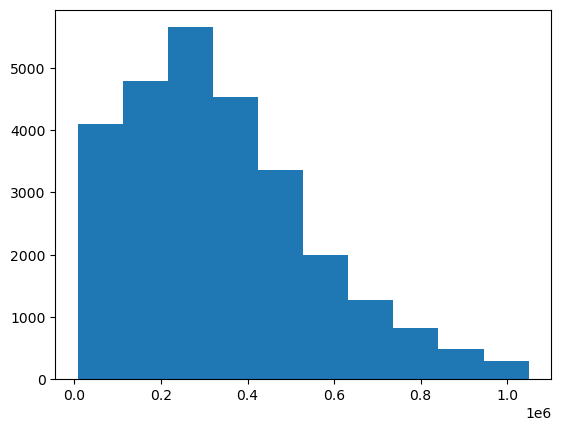

In [51]:
plt.hist(y_train)

In [52]:
tweedie = TweedieRegressor(power=0)

tweedie.fit(X_train, y_train)

TweedieRegressor(power=0)

In [53]:
preds['tweedie'] = tweedie.predict(X_train)
preds.head()

,actual,baseline,lm_preds,lasso_preds,poly_preds,lasso_poly,tweedie
50421,247327.0,338239.323646,382976.0,383364.629958,381696.0,381550.563274,324748.458620
51037,79255.0,338239.323646,456704.0,458369.228945,445696.0,442957.975874,347184.202529
47272,158202.0,338239.323646,221824.0,223289.722547,217600.0,225669.599622,311762.857890
16353,354794.0,338239.323646,209408.0,210773.724980,206848.0,216270.426387,311404.264183
30173,446560.0,338239.323646,475264.0,479116.473037,500736.0,498876.060021,371215.448945


In [54]:
tweedie_rmse = rmse(preds, 'tweedie')
tweedie_rmse

206851.4550470131

In [55]:
tweedietwo = TweedieRegressor(power=1)

tweedietwo.fit(X_train, y_train)

TweedieRegressor(power=1)

In [58]:
baseline_rmse = rmse(preds, 'baseline')
baseline_rmse

213586.6480901735

In [77]:
rmse_df = pd.DataFrame({'model':['baseline','linear', 'lasso','linear_poly', 'lasso_poly','tweedie_norm'],
              'rmse':[baseline_rmse, lm_rmse, lasso_rmse, poly_rmse, lassopoly_rmse, tweedie_rmse]})

In [78]:
rmse_df.sort_values('rmse')

,model,rmse
4,lasso_poly,189000.608095
3,linear_poly,189016.541346
2,lasso,189261.316299
1,linear,189264.485344
5,tweedie_norm,206851.455047
0,baseline,214751.746325


[Text(0, 6, '189001'),
 Text(0, 6, '189017'),
 Text(0, 6, '189261'),
 Text(0, 6, '189264'),
 Text(0, 6, '206851'),
 Text(0, 6, '214752')]

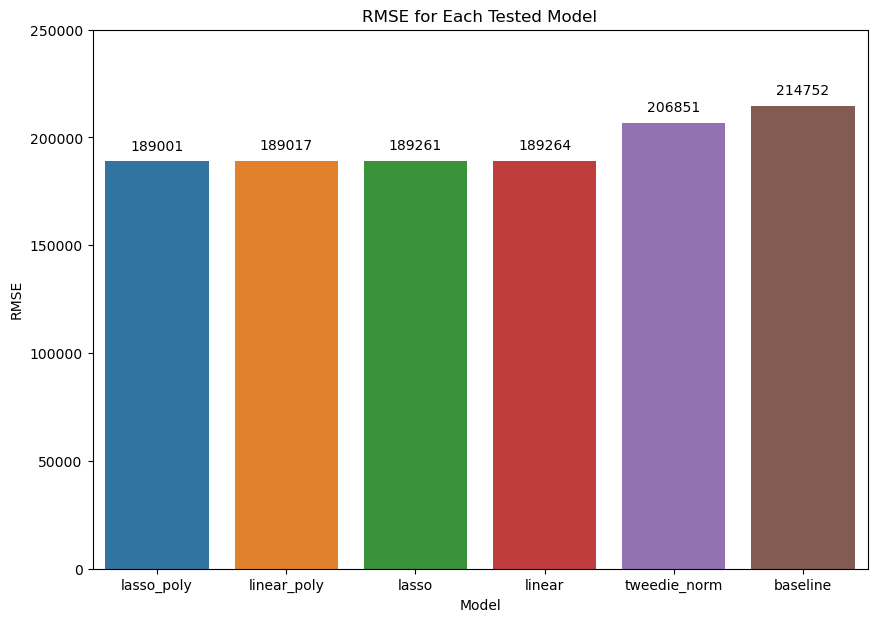

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
bplot = sns.barplot(x='model',y='rmse', data=rmse_df.sort_values('rmse'))
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.title('RMSE for Each Tested Model')
plt.ylim(0, 250000)
ax.bar_label(bplot.containers[0], padding= 6)

# Testing models on validate set

In [62]:
pf = PolynomialFeatures(degree=2)

pf.fit(X_train, y_train)

PolynomialFeatures()

In [63]:
X_val_polynomial = pf.transform(X_val)

In [64]:
lmtwo = LinearRegression()

lmtwo.fit(X_polynomial, y_train)

LinearRegression()

In [65]:
val_preds = pd.DataFrame({'actual':y_val,
                          'baseline':y_train.mean()})
val_preds.head()

,actual,baseline
21265,685000.0,338239.323646
11822,679014.0,338239.323646
33136,211276.0,338239.323646
5444,125665.0,338239.323646
51417,254635.0,338239.323646


In [87]:
val_preds['lasso_preds'] = lasso.predict(X_val)

val_preds['poly_preds'] = lmtwo.predict(X_val_polynomial)

val_preds['lasso_poly'] = lassotwo.predict(X_val_polynomial)

val_preds.head()

,actual,baseline,lm_preds,lasso_preds,poly_preds,lasso_poly
21265,685000.0,338239.323646,552704.0,558486.495146,575232.0,567707.893381
11822,679014.0,338239.323646,569856.0,576537.297950,558592.0,570168.378639
33136,211276.0,338239.323646,384000.0,381598.332718,380416.0,379897.399918
5444,125665.0,338239.323646,437888.0,437968.031423,428544.0,424417.323593
51417,254635.0,338239.323646,482304.0,477777.913164,477184.0,471351.299597


In [91]:
baseline_rmse = rmse(val_preds, 'baseline')

lasso_rmse = rmse(val_preds, 'lasso_preds')

poly_rmse = rmse(val_preds, 'poly_preds')

lassopoly_rmse = rmse(val_preds, 'lasso_poly')

In [92]:
val_rmse_df = pd.DataFrame({'model':['baseline', 'lasso','linear_poly', 'lasso_poly'],
              'rmse':[baseline_rmse, lasso_rmse, poly_rmse, lassopoly_rmse]})
val_rmse_df.sort_values('rmse')

,model,rmse
3,lasso_poly,189000.608095
2,linear_poly,189016.541346
1,lasso,189261.316299
0,baseline,214751.746325


In [93]:
rmse_df.sort_values('rmse')

,model,rmse
4,lasso_poly,189000.608095
3,linear_poly,189016.541346
2,lasso,189261.316299
1,linear,189264.485344
5,tweedie_norm,206851.455047
0,baseline,214751.746325


In [86]:
val_rmse_df['difference'] = val_rmse_df['rmse'] - rmse_df['rmse']
val_rmse_df.sort_values('rmse')

,model,rmse,difference
3,lasso_poly,189000.608095,-15.933250
2,linear_poly,189016.541346,-244.774954
1,lasso,189261.316299,-3.169045
0,baseline,214751.746325,0.000000


The best model is the lasso_poly. I will be testing the linear_poly on my test data set

# Testing best model on test data set

In [71]:
X_test_polynomial = pf.transform(X_test)

In [74]:
test_preds = pd.DataFrame({'actual':y_test,
                           'test_pred':lassotwo.predict(X_test_polynomial)})

In [75]:
round(rmse(test_preds, 'test_pred'), 2)

186486.63